#**Modelos de Simulación Actuarial**







##Problema 1
1.- Determinar la probabilidad frecuentista que en cuatro lanzamientos de un dado se obtiene al menos un seis?

In [ ]:
#Inputs del modelo

x = [1,2,3,4,5,6]
n = 100000
m = 4
dado = []
resultado = 0
simulacion = 0
prob = []

In [ ]:
#Algoritmo
import random
import numpy as np

for k in range(1,n+1):
  dado = random.choices(x,k=m)
  for i in range(1,m+1):
    if (dado[i-1]==6):
      resultado = resultado+1
  if (resultado>=1):
    simulacion = simulacion+1
  resultado = 0
  prob.append(simulacion/k)

La probabilidad cuando n=10,100,1000,10000,100000 es: [0.1, 0.47, 0.529, 0.5183, 0.51958] respectivamente


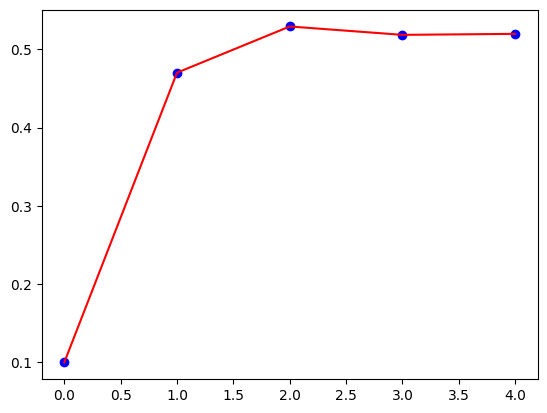

In [ ]:
#Resultados
import matplotlib.pyplot as plt

fprobabilidad=[prob[9],prob[99],prob[999],prob[9999],prob[99999]]
print("La probabilidad cuando n=10,100,1000,10000,100000 es:",fprobabilidad,"respectivamente")
plt.scatter(range(len(fprobabilidad)), fprobabilidad,color='blue')
plt.plot(range(len(fprobabilidad)), fprobabilidad, color='red')
plt.show()

##Problema 2
2.- Suponiendo que se tiene una moneda justa, aproximar la probabilidad de que salgan 3 caras en
un total de 10 lanzamientos.

In [ ]:
#Inputs del modelo
p = 0.5
m = 10
n = 100000
cara = 0
simulacion = 0
prob = []

In [ ]:
#Algoritmo
import random
import numpy as np

for k in range(1,n+1):
  for i in range(1,m+1):
    aux = random.random()
    if (aux<=p):
      cara= cara+1
  if (cara==3):
    simulacion = simulacion+1
  cara = 0
  prob.append(simulacion/k)


La probabilidad cuando n=10,100,1000,10000,100000 es [0.1, 0.11, 0.117, 0.1158, 0.11561] respectivamente


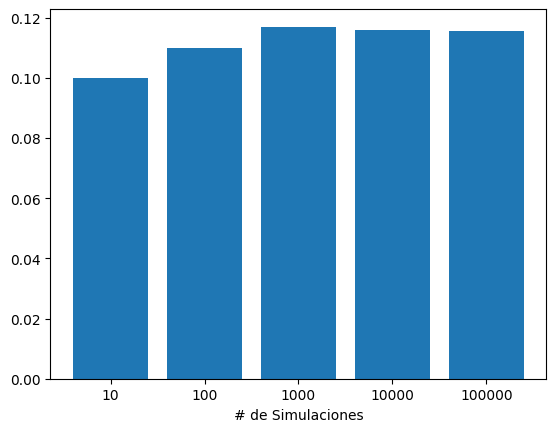

In [ ]:
#Resultados
import matplotlib.pyplot as plt

probabilidad=[prob[9],prob[99],prob[999],prob[9999],prob[99999]]
sim=["10","100","1000","10000","100000"]
print("La probabilidad cuando n=10,100,1000,10000,100000 es",probabilidad,"respectivamente")

barras = range(len(probabilidad))
plt.bar(barras, probabilidad)
plt.xticks(barras, sim)
plt.xlabel('# de Simulaciones')
plt.show()

##Problema 3
3.- Consideremos tres números aleatorios entre (0,1) y un radio de la esfera r=1.

Estime el volumen de la esfera mediante técnicas de simulación.

In [ ]:
#Inputs del modelo
n = 100000
favorables = 0
A1 = []
est = []

In [ ]:
#Algoritmo
import random
import numpy as np

for k in range(1,n+1):
  aux1 = random.random()
  aux2 = random.random()
  aux3 = random.random()
  if (((aux1**2+aux2**2+aux3**2)**0.5)<=1):
    favorables = favorables+1
  A1.append(favorables/k)
  est.append(A1[k-1]*8)

La probabilidad cuando n=10,100,1000,10000,100000 es: [5.6, 5.2, 4.6, 4.268, 4.18928] respectivamente


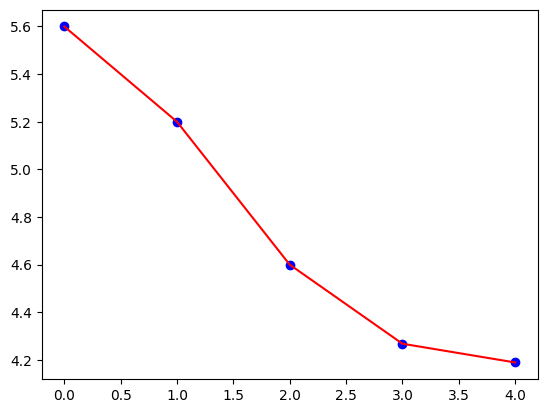

In [ ]:
#Resultados
import matplotlib.pyplot as plt

evolumen=[est[9],est[99],est[999],est[9999],est[99999]]
print("La probabilidad cuando n=10,100,1000,10000,100000 es:",evolumen,"respectivamente")
plt.scatter(range(len(evolumen)), evolumen,color='blue')
plt.plot(range(len(evolumen)), evolumen, color='red')
plt.show()

In [ ]:
fprobabilidad

[0.1, 0.47, 0.529, 0.5183, 0.51958]

In [ ]:
probabilidad

[0.1, 0.11, 0.117, 0.1158, 0.11561]

In [ ]:
evolumen

[5.6, 5.2, 4.6, 4.268, 4.18928]

## Problema 4

4. Supongamos que se toman 25 mediciones de un diámetro d de una circunferencia. Cada una de las n mediciones está sujeta a un error aleatorio con distribución normal(0,1), es decir x = d+e. Nuestro objetivo es estimar el área cubierta por este diámetro como A=pi(x/2)^2.

Aprximar el área de la circunferencia.

In [ ]:
#Definición de Parámetros
import numpy as np

n = 25 #número de mediciones
d = 10 #valor del diámetro
r = np.zeros(n) #definimos un vector de ceros 1x25 para guardar los radios
pi = 3.1416
m = 100000 #número de iteraciones
a = np.zeros(m) #definimos un vector de ceros 1x25 para guardar las áreas

In [ ]:
#Solución del problema
for p in range(m):
    for k in range(n):
        e = np.random.normal(0, 1)
        x = d + e
        r[k] = x / 2
    R = sum(r) / 25
    a[p] = pi * (R**2)

In [ ]:
#Resultado
A = sum(a) / m
print(A)

78.5647719856064


## Problema 5

5. Supongamos que se tiene la siguiente cadena de Markov;
          0.40 0.30 0.30 0.30 0.50 0.20 0.25 0.25 0.50

Aprximar la probabilidad de que una persona que empieza en el estado 1 se encuentre en el estado 1 después de 10 pasos.

In [ ]:
import numpy as np
from numpy.random import uniform

# Definicion de variables
n = 10  # Numero de pasos
m = np.array([[0.4, 0.3, 0.3],
              [0.3, 0.5, 0.2],
              [0.25, 0.25, 0.5]])

pos = np.array([1])

In [ ]:
# Funcion de generacion de posicion
for k in range(1, n+1):
    u = uniform(0, 1)
    for e in range(1, 4):
        if u <= np.cumsum(m[pos[k-1], :])[e-1]:
            pos = np.append(pos, e-1)
            break


In [ ]:
# Generacion de Matriz de simulaciones
sim = 100000
mpos = np.zeros((sim, 3))


In [ ]:
# Probabilidades obtenidas
for i in range(sim):
    pos = np.array([1])
    for k in range(1, n+1):
        u = uniform(0, 1)
        for e in range(1, 4):
            if u <= np.cumsum(m[pos[k-1], :])[e-1]:
                pos = np.append(pos, e-1)
                break
    mpos[i, pos[-1]] = 1

# Calculating probabilities
vector_probabilidades = [
    np.sum(mpos[0:10, 1]) / 10,
    np.sum(mpos[0:100, 1]) / 100,
    np.sum(mpos[0:1000, 1]) / 1000,
    np.sum(mpos[0:10000, 1]) / 10000,
    np.sum(mpos[:, 1]) / sim
]

print(mpos)
print(vector_probabilidades) #para 10, 100, 1000, 10000, 100000

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
[0.2, 0.33, 0.355, 0.353, 0.3538]
